In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from tqdm import tqdm

In [2]:
df = pd.read_csv("data/csv/stock_20210303.csv")
df['TRADENO'] = df['TRADENO'].astype('str')

In [16]:
df.TIME.astype(str).apply(lambda x: (int(x[0:2]) * 3600 + int(x[2:4]) * 60 + int(x[4:6])) * pow(10, len(x[6:])) + int(x[6:]))

0           36000100000
1           36000100000
2           36000100000
3           36000100000
4           36000100000
               ...     
27518463    84905233505
27518464    84920233520
27518465    84966233606
27518466    85027233707
27518467    85051233731
Name: TIME, Length: 27518468, dtype: int64

In [8]:
df.TIME[8234569]

123824082646

In [3]:
action_two = df[df.ACTION == 2]
action_one = df[df.ACTION == 1]
jn = action_two.join(action_one, how='left', on='ORDERNO', rsuffix='_')

0.08050083845177562


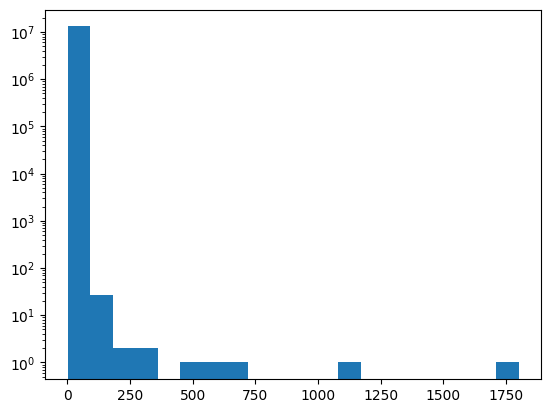

In [4]:
result = df.groupby('ORDERNO').agg({'VOLUME': ['first', 'sum']})
result.columns = [f'{col[1]}' for col in result.columns]
print(np.mean(result['sum'] / result['first'] != 2) * 100)
plt.hist(result['sum'] / result['first'], bins=20)
plt.yscale('log')
plt.show()

In [5]:
from src.exchange_env.exchange_simulator import ExchangeDataset
from src.exchange_env.exchange_simulator import Exchange

In [6]:
logs = ExchangeDataset("stock_20210303.csv", green_stocks=['GAZP'])

In [7]:
exchange = Exchange(logs.get_stocks())

In [8]:
for id, dt in enumerate(tqdm(logs.get_data(), total=len(logs))):
    time = dt['time']
    rows = dt['rows']
    exchange.execute_orders(rows)

100%|██████████| 946074/946074 [02:36<00:00, 6028.46it/s]


In [9]:
ask, bid = exchange.get_volumes()

In [18]:
min(ask[0])

(223.12, 50720)

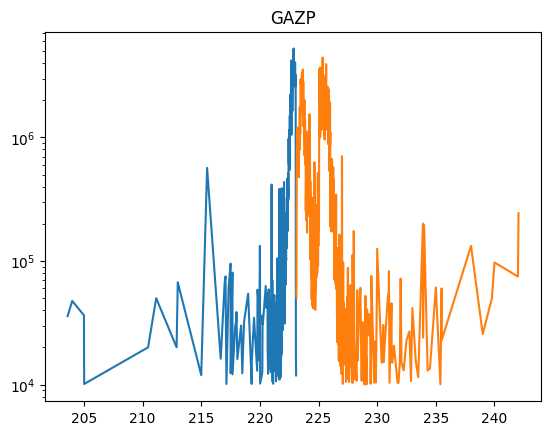

In [11]:
for i in range(len(bid)):
    plt.plot([price for price, volume in bid[i] if volume > 10000], [volume for price, volume in bid[i] if volume > 10000])
    plt.plot([price for price, volume in ask[i] if volume > 10000], [volume for price, volume in ask[i] if volume > 10000])
    plt.title(logs.get_stocks()[i])
    plt.yscale('log')
    plt.show()

In [16]:
res = exchange.get_logs()

In [ ]:
len(res['GAZP'])

234220752

In [68]:
exchange.stocks['GAZP'].bid_side.prices

SortedSet([203.61, 203.63, 204.0, 204.01, 204.1, 204.11, 204.5, 204.63, 204.85, 205.0, 205.01, 205.02, 205.1, 205.12, 205.13, 205.2, 205.28, 205.4, 205.45, 205.5, 205.55, 205.58, 205.6, 205.7, 205.76, 205.97, 205.99, 206.0, 206.01, 206.02, 206.03, 206.12, 206.16, 206.2, 206.24, 206.25, 207.0, 207.01, 207.06, 207.12, 207.13, 207.59, 207.6, 207.76, 207.77, 208.0, 208.31, 208.4, 208.42, 208.63, 208.7, 208.82, 208.86, 208.96, 209.0, 209.01, 209.05, 209.12, 209.2, 209.3, 209.33, 209.45, 209.58, 209.67, 209.69, 209.73, 209.81, 209.88, 209.91, 209.95, 210.0, 210.01, 210.02, 210.04, 210.05, 210.08, 210.1, 210.15, 210.16, 210.18, 210.2, 210.4, 210.47, 210.5, 210.51, 210.53, 210.55, 210.6, 210.63, 210.65, 210.75, 210.8, 210.93, 210.94, 210.97, 211.0, 211.01, 211.04, 211.07, 211.08, 211.09, 211.1, 211.11, 211.12, 211.16, 211.2, 211.32, 211.33, 211.36, 211.4, 211.41, 211.45, 211.46, 211.5, 211.51, 211.55, 211.59, 211.6, 211.61, 211.65, 211.69, 211.74, 211.76, 211.79, 211.86, 211.96, 211.98, 212.0,

In [13]:
alrs = df[df.SECCODE == 'ALRS'].reset_index().drop(columns=['index'])
vtbe = df[df.SECCODE == 'VTBE'].reset_index().drop(columns=['index'])

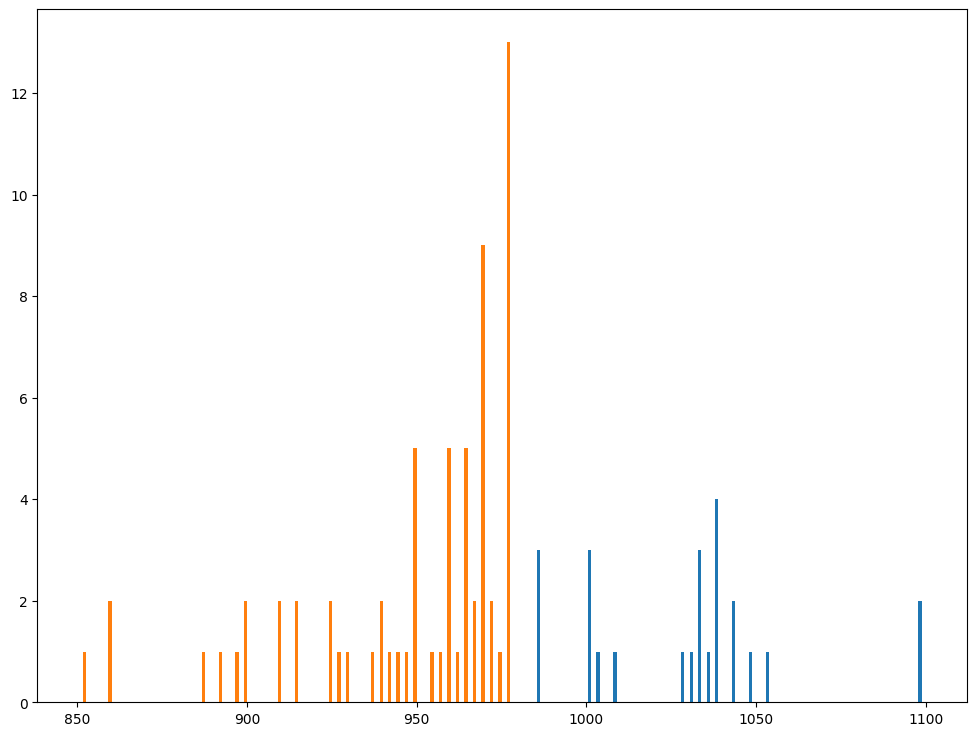

In [41]:
first = vtbe.loc[:90]
plt.figure(figsize=(12, 9))
plt.hist([first[first.BUYSELL == 'S'].PRICE, first[first.BUYSELL == 'B'].PRICE], bins=100)
plt.show()

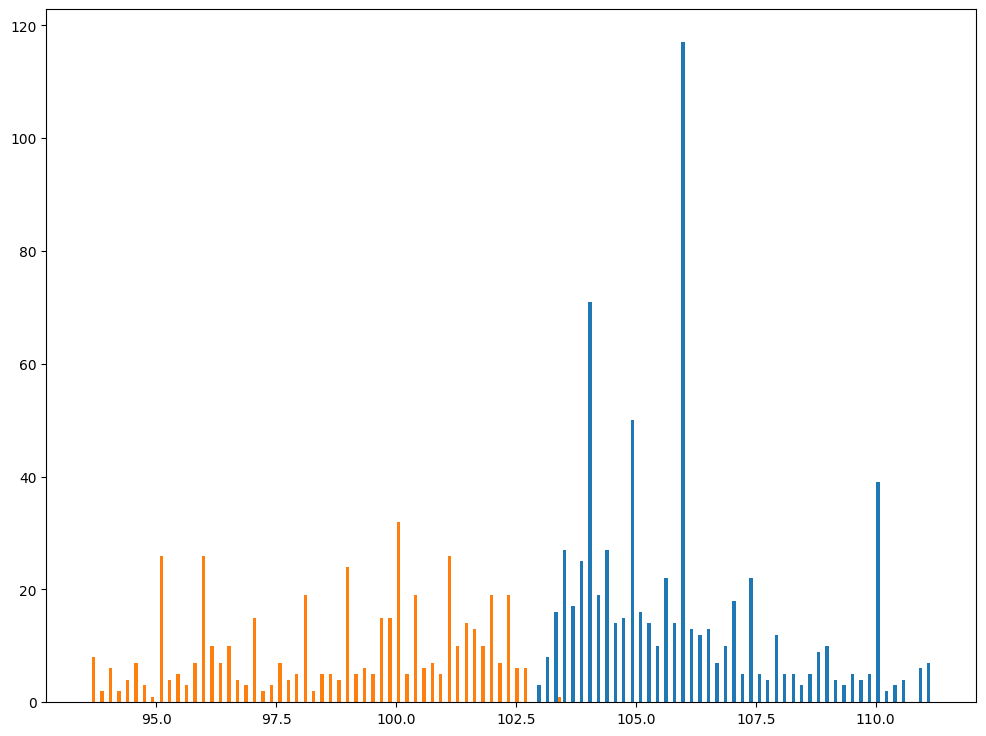

In [10]:
first = alrs.loc[:1208]
plt.figure(figsize=(12, 9))
plt.hist([first[first.BUYSELL == 'S'].PRICE, first[first.BUYSELL == 'B'].PRICE], bins=100)
plt.show()